# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import textwrap

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
temp_units = "metric"
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city    
    city_url = url  + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]   
        city_lng = city_weather["coord"]["lon"]   
        city_max_temp = city_weather["main"]["temp_max"]   
        city_humidity = city_weather["main"]["humidity"]   
        city_clouds = city_weather["clouds"]["all"]        
        city_wind = city_weather["wind"]["speed"]          
        city_country = city_weather["sys"]["country"]      
        city_date = city_weather["dt"]  
        
        # Append the City information into city_data list
        city_data.append (
                            {
                                "City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date
                           }
                        )
        
 # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | kindu
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | ulladulla
Processing Record 16 of Set 1 | kidodi
Processing Record 17 of Set 1 | bargal
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | kimberley
Processing Record 21 of Set 1 |

City not found. Skipping...
Processing Record 39 of Set 4 | gijon
Processing Record 40 of Set 4 | cam pha
City not found. Skipping...
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | dawlatabad
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | pocatello
Processing Record 45 of Set 4 | arhus
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | harur
Processing Record 48 of Set 4 | rundu
Processing Record 49 of Set 4 | nome
Processing Record 0 of Set 5 | srednekolymsk
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | santiago del estero
Processing Record 3 of Set 5 | daru
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | khani
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | omboue
Processing Record 9 of Set 5 | phan rang
City not found. Skipping...
Processing Record 10 of Set 5 | victoria
Processing Record 11 of Set

Processing Record 28 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 29 of Set 8 | warri
Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 8 | elat
Processing Record 33 of Set 8 | samfya
Processing Record 34 of Set 8 | kultuk
Processing Record 35 of Set 8 | hailun
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | nigde
Processing Record 39 of Set 8 | divnomorskoye
Processing Record 40 of Set 8 | baghdad
Processing Record 41 of Set 8 | general roca
Processing Record 42 of Set 8 | dauphin
Processing Record 43 of Set 8 | qena
Processing Record 44 of Set 8 | raga
Processing Record 45 of Set 8 | mangrol
Processing Record 46 of Set 8 | belmonte
Processing Record 47 of Set 8 | tacoaleche
Processing Record 48 of Set 8 | eslov
Processing Record 49 of Set 8 | keffi
Processing Record 0 of Set 9 | gizo
Processing Record 1 of

Processing Record 19 of Set 12 | bordusani
Processing Record 20 of Set 12 | mehamn
Processing Record 21 of Set 12 | marathon
Processing Record 22 of Set 12 | mgandu
Processing Record 23 of Set 12 | carauari
Processing Record 24 of Set 12 | leningradskiy
Processing Record 25 of Set 12 | ayorou
Processing Record 26 of Set 12 | ascension
Processing Record 27 of Set 12 | yenagoa
Processing Record 28 of Set 12 | hirara
Processing Record 29 of Set 12 | xichang
Processing Record 30 of Set 12 | labuhan
Processing Record 31 of Set 12 | winnemucca
Processing Record 32 of Set 12 | tabou
Processing Record 33 of Set 12 | shelburne
Processing Record 34 of Set 12 | solvychegodsk
Processing Record 35 of Set 12 | oranjemund
Processing Record 36 of Set 12 | kiruna
Processing Record 37 of Set 12 | sibolga
Processing Record 38 of Set 12 | ryotsu
Processing Record 39 of Set 12 | manzhouli
Processing Record 40 of Set 12 | hudson bay
Processing Record 41 of Set 12 | ozernovskiy
Processing Record 42 of Set 12

In [4]:
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=80913234e69296e45dd43131c22cd2ae&units=metric&q=


In [5]:
city_data

[{'City': 'georgetown',
  'Lat': 5.4112,
  'Lng': 100.3354,
  'Max Temp': 26.96,
  'Humidity': 83,
  'Cloudiness': 20,
  'Wind Speed': 2.06,
  'Country': 'MY',
  'Date': 1678409698},
 {'City': 'tasiilaq',
  'Lat': 65.6145,
  'Lng': -37.6368,
  'Max Temp': -10.64,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 2.99,
  'Country': 'GL',
  'Date': 1678409820},
 {'City': 'jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': -0.82,
  'Humidity': 97,
  'Cloudiness': 85,
  'Wind Speed': 1.57,
  'Country': 'US',
  'Date': 1678409806},
 {'City': 'kindu',
  'Lat': -2.95,
  'Lng': 25.95,
  'Max Temp': 20.96,
  'Humidity': 99,
  'Cloudiness': 100,
  'Wind Speed': 0.78,
  'Country': 'CD',
  'Date': 1678410060},
 {'City': 'saint george',
  'Lat': 37.1041,
  'Lng': -113.5841,
  'Max Temp': 18.3,
  'Humidity': 19,
  'Cloudiness': 61,
  'Wind Speed': 2.24,
  'Country': 'US',
  'Date': 1678409815},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 9.06,
  'Humid

In [6]:
# Convert the cities weather data into a Pandas DataFrame                                 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,26.96,83,20,2.06,MY,1678409698
1,tasiilaq,65.6145,-37.6368,-10.64,91,100,2.99,GL,1678409820
2,jamestown,42.0970,-79.2353,-0.82,97,85,1.57,US,1678409806
3,kindu,-2.9500,25.9500,20.96,99,100,0.78,CD,1678410060
4,saint george,37.1041,-113.5841,18.30,19,61,2.24,US,1678409815


In [7]:
# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,83,20,2.06,MY,1678409698
1,tasiilaq,65.6145,-37.6368,-10.64,91,100,2.99,GL,1678409820
2,jamestown,42.0970,-79.2353,-0.82,97,85,1.57,US,1678409806
3,kindu,-2.9500,25.9500,20.96,99,100,0.78,CD,1678410060
4,saint george,37.1041,-113.5841,18.30,19,61,2.24,US,1678409815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

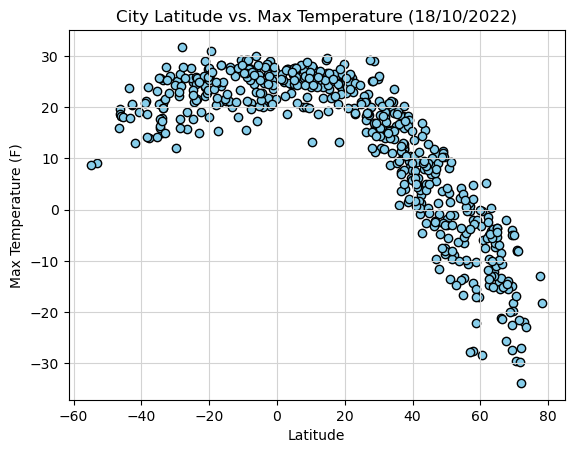

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Max Temperature (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True,  which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("Output_image/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

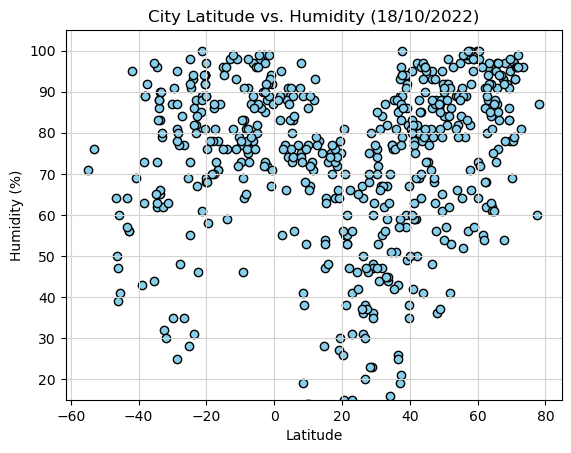

In [11]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")
# Incorporate the other graph properties 
plt.title("City Latitude vs. Humidity (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("Output_image/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

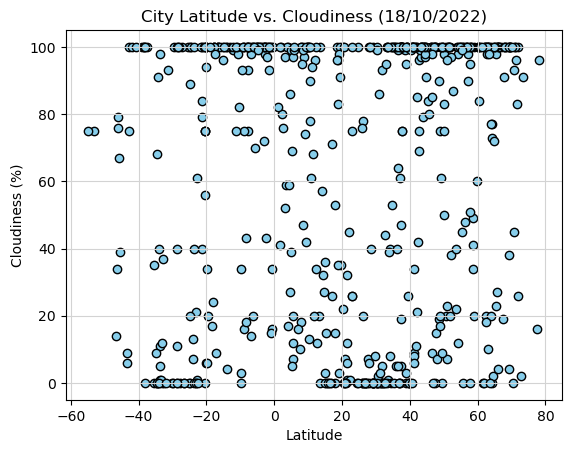

In [12]:
# Build the scatter plots for latitude vs. cloudiness 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Cloudiness (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("Output_image/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

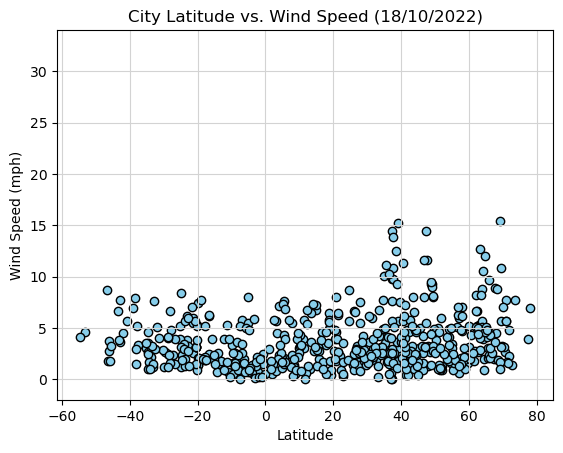

In [13]:
# Build the scatter plots for latitude vs. wind speed 
plt.scatter(city_data_df["Lat"],  city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Wind Speed (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots 
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of line
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_equation, text_coordinates, fontsize=15,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")


In [24]:
index13 = city_data_df.loc[13]
index13

City              kidodi
Lat              -7.6036
Lng              37.0044
Max Temp           20.84
Humidity              91
Cloudiness            75
Wind Speed          1.79
Country               TZ
Date          1678410060
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,83,20,2.06,MY,1678409698
1,tasiilaq,65.6145,-37.6368,-10.64,91,100,2.99,GL,1678409820
2,jamestown,42.0970,-79.2353,-0.82,97,85,1.57,US,1678409806
4,saint george,37.1041,-113.5841,18.30,19,61,2.24,US,1678409815
6,la ronge,55.1001,-105.2842,-13.30,90,99,3.44,CA,1678410041


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,83,20,2.06,MY,1678409698
1,tasiilaq,65.6145,-37.6368,-10.64,91,100,2.99,GL,1678409820
2,jamestown,42.0970,-79.2353,-0.82,97,85,1.57,US,1678409806
4,saint george,37.1041,-113.5841,18.30,19,61,2.24,US,1678409815
6,la ronge,55.1001,-105.2842,-13.30,90,99,3.44,CA,1678410041


In [27]:
len(northern_hem_df)

395

In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kindu,-2.9500,25.9500,20.96,99,100,0.78,CD,1678410060
5,punta arenas,-53.1500,-70.9167,9.06,76,75,4.63,CL,1678409600
7,cape town,-33.9258,18.4232,17.99,86,40,1.54,ZA,1678409333
8,ushuaia,-54.8000,-68.3000,8.81,71,75,4.12,AR,1678409656
9,carnarvon,-24.8667,113.6333,25.04,55,0,8.42,AU,1678409824


In [29]:
len(southern_hem_df)

173

###  Temperature vs. Latitude Linear Regression Plot

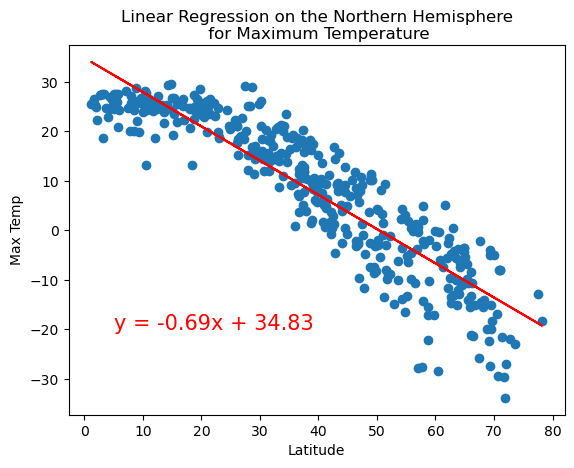

The p-value is: 0.000
The r-value is: -0.904


In [30]:
# Linear regression on Northern Hemisphere 
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))

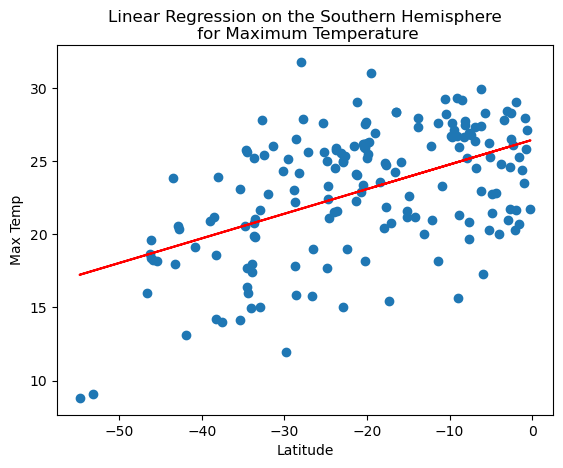

The p-value is: 0.000
The r-value is: 0.506


In [31]:
# Linear regression on Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:
          - The linear regression for temperature  can be best fit for the data given both in northern and southern hemispher

### Humidity vs. Latitude Linear Regression Plot

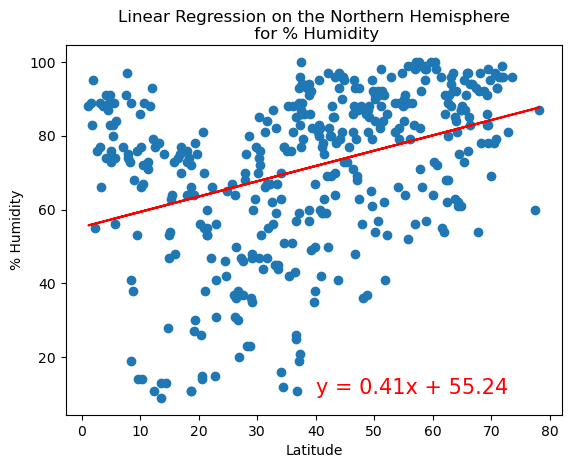

The p-value is: 0.000
The r-value is: 0.370


In [32]:
# Northern Hemisphere  
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

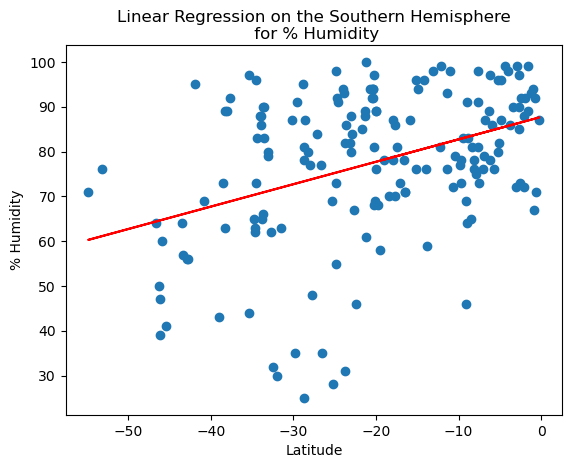

The p-value is: 0.000
The r-value is: 0.393


In [33]:
# Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

**Discussion about the linear relationship: - Another kind of regression has to be produced as linear regression is not best for 
the humidity data in both hemisphers

### Cloudiness vs. Latitude Linear Regression Plot

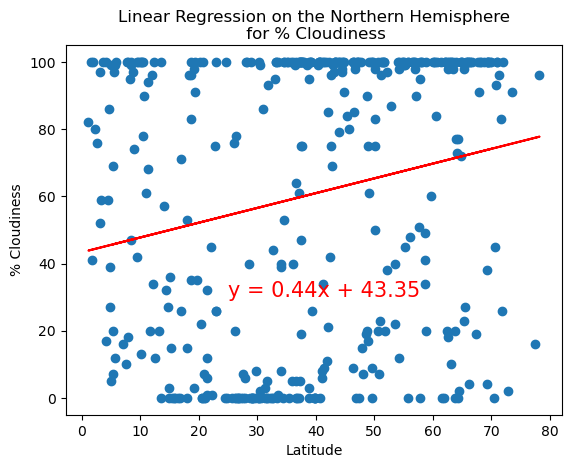

The p-value is: 0.000
The r-value is: 0.205


In [34]:
# Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

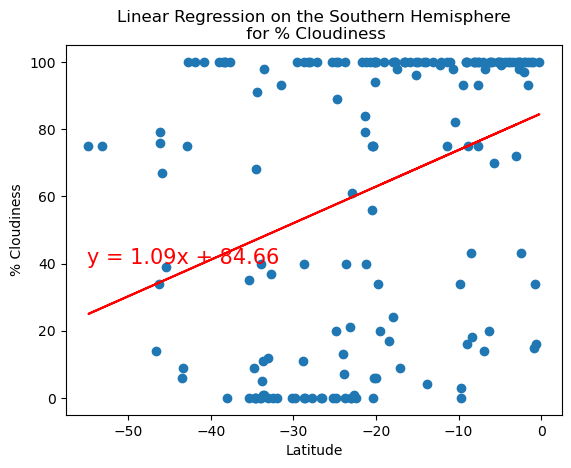

The p-value is: 0.000
The r-value is: 0.342


In [35]:
# Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

**Discussion about the linear relationship: - Linear regression is not best fit hence another regression needs to be produced for cloudness in both hemisphers

### Wind Speed vs. Latitude Linear Regression Plot

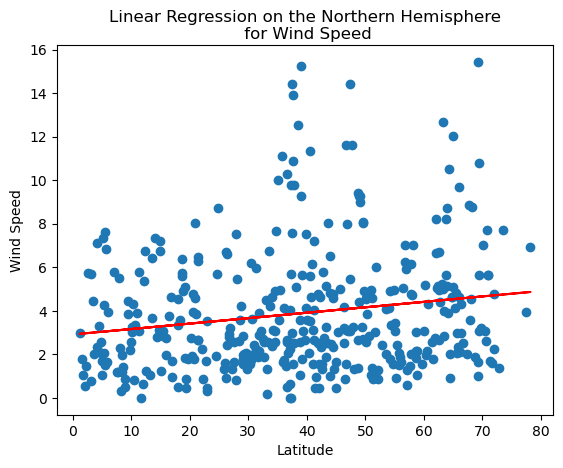

The p-value is: 0.001
The r-value is: 0.174


In [41]:
# Northern Hemisphere 
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

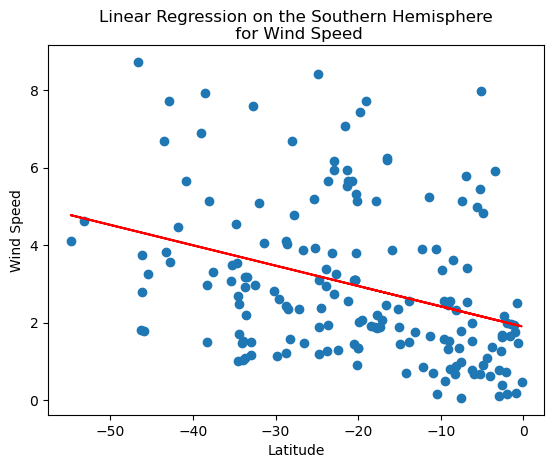

The p-value is: 0.000
The r-value is: -0.347


In [42]:
# Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))

**Discussion about the linear relationship:- Similarily linear regression is not best fit for wind speed data in both hemisphers